In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('C:/Users/HP/Desktop/archive/honeyproduction 1998-2021.csv')
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.shape

(985, 8)

In [5]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [6]:
df.dtypes.value_counts()

float64    5
int64      2
object     1
dtype: int64

In [7]:
df['State'].value_counts()

Alabama           24
Montana           24
New Jersey        24
New York          24
North Carolina    24
North Dakota      24
Ohio              24
Oregon            24
Pennsylvania      24
South Dakota      24
Tennessee         24
Texas             24
Utah              24
Vermont           24
Virginia          24
Washington        24
West Virginia     24
Wisconsin         24
Wyoming           24
Arizona           24
Nebraska          24
Missouri          24
Iowa              24
Arkansas          24
California        24
Colorado          24
Florida           24
Georgia           24
Hawaii            24
Idaho             24
Illinois          24
Indiana           24
Kansas            24
Mississippi       24
Kentucky          24
Louisiana         24
Maine             24
Michigan          24
Minnesota         24
New Mexico        15
Nevada            11
South Carolina    11
Oklahoma           6
Maryland           6
Name: State, dtype: int64

- year is integer type currently. Since year is a categorical variable here, 
- let us convert it to category data data type in Python

## 1 :- How has honey production yield changed from 1998 to 2021?

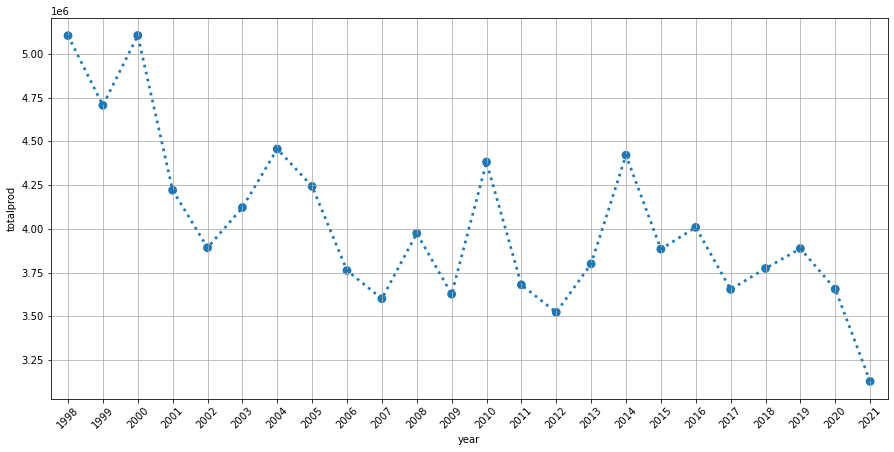

In [8]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=df,  linestyles=':',ci=None)
plt.xticks(rotation=45) # To rotate the x axis labls
plt.grid()
plt.show()




Observation :-

- The overall honey production in the US has been decresing over the years.
- Total honey production = number of colonies * average yield per colony.

## 2 :- Overtime ,what are the major production trends across the states?

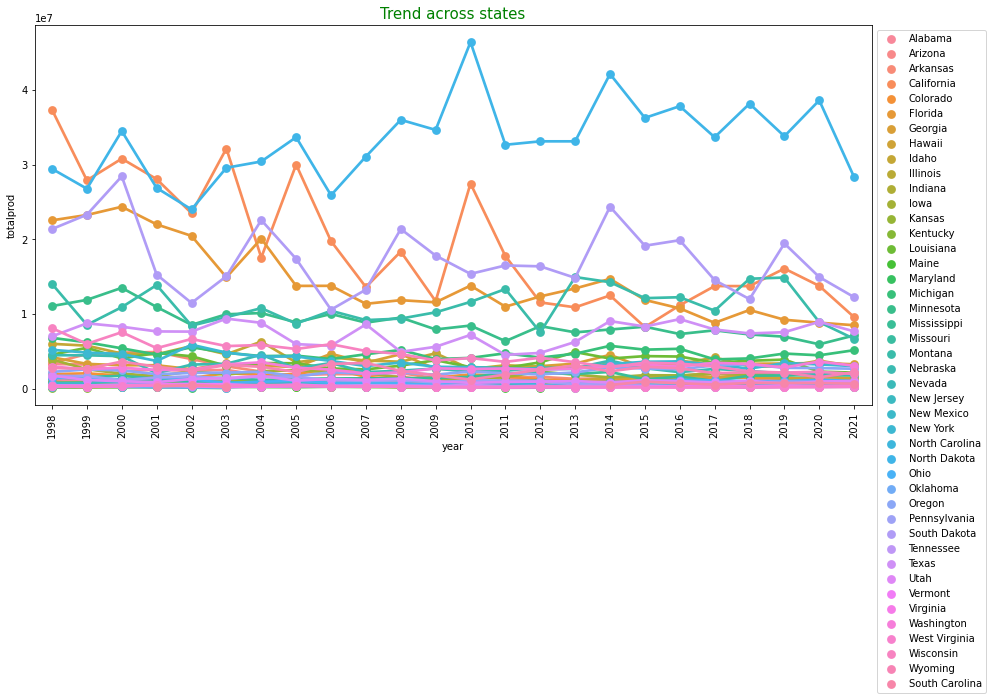

In [9]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'State')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.title('Trend across states',size=15 , color='green')
plt.show()


## Observations:

- There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding.



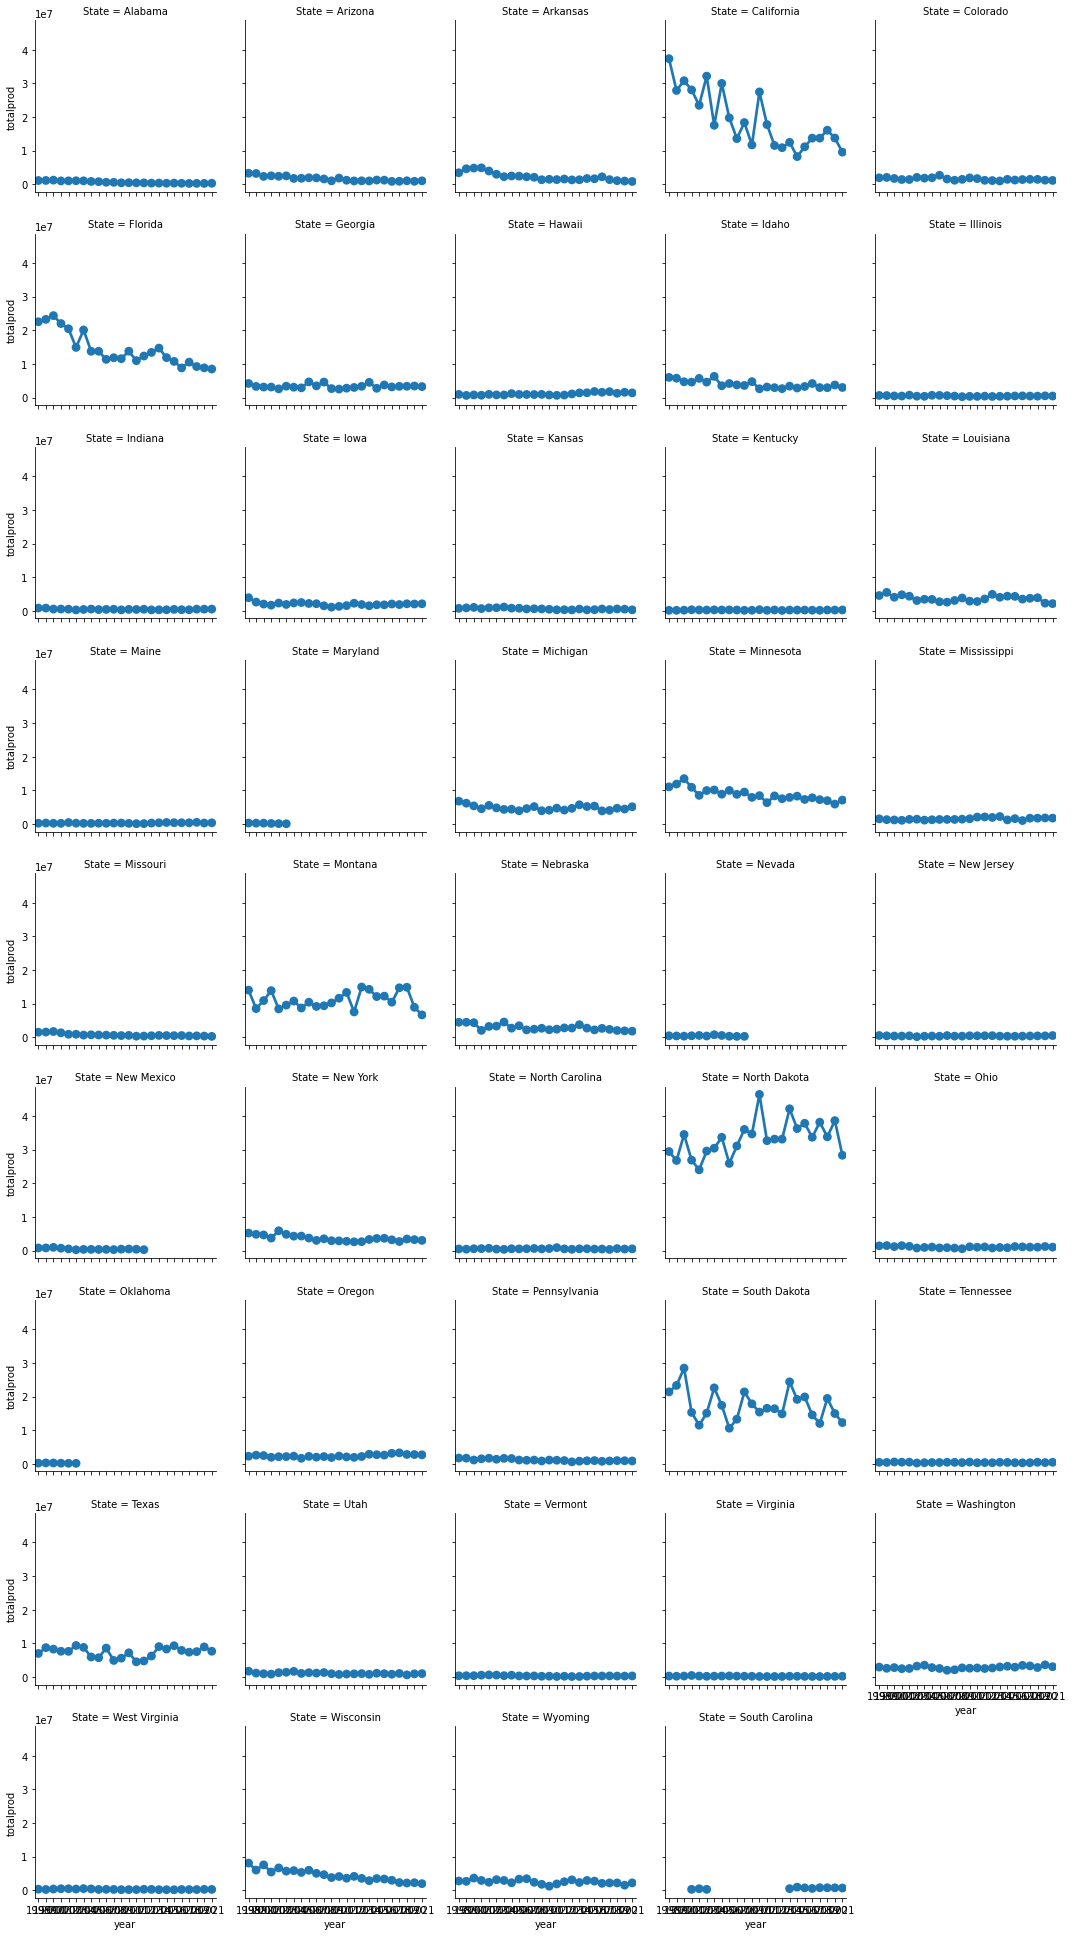

In [12]:
sns.catplot(x='year', y='totalprod', data=df,
                estimator=sum, col='State', kind="point",
                height=3,col_wrap = 5)
plt.show()

## Observations:

- The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
- Unfortunately, the honey production in California has seen a steep decline over the years.
- Florida's total production also has been on a decline.
- South Dakota has more of less maintained its levels of production.
- North Dakota has actually seen an impressive increase in the honey production.

##  3  :- Does the data show any trends in terms of the number of honey producing colonies and yieldpercolony before 2006 , which was when concern over Colony Collapse Disorder spread nationwide?

In [55]:
bef_year=df[df['year']<2006]
bef_year.shape

(343, 8)

<Figure size 1080x504 with 0 Axes>

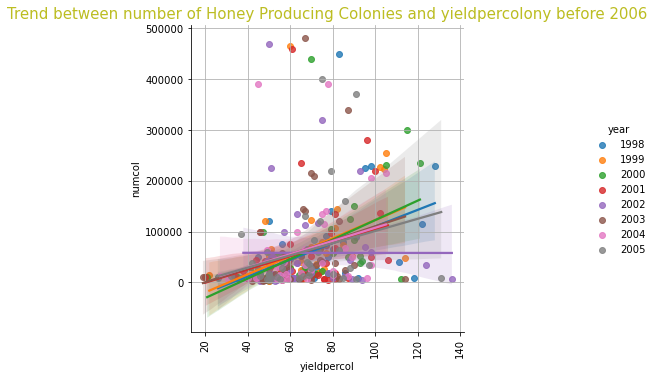

In [108]:
plt.figure(figsize=(15,7))
sns.lmplot(x = 'yieldpercol', y = 'numcol', data =bef_year, hue = 'year')
plt.xticks(rotation=90)# To rotate the x axis labls

plt.title('Trend between number of Honey Producing Colonies and yieldpercolony before 2006' ,size=15 , color='tab:olive') 
plt.grid()
plt.show()

## 4 :-Are there any patterns that can be observed between total honey production and value of production every year?

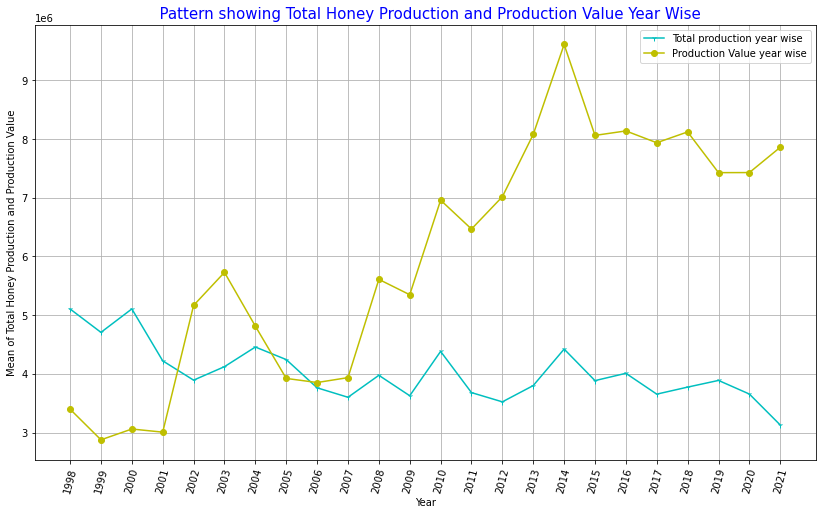

In [106]:
df1 = df.groupby('year')[['totalprod','prodvalue']].mean()

plt.figure(figsize=(14,8)) 
plt.plot(df1.index,df1['totalprod'],marker='1',color='c',label='Total production year wise') 
plt.plot(df1.index,df1['prodvalue'],marker='o',color='y',label='Production Value year wise')
plt.xlabel('Year') 
plt.ylabel('Mean of Total Honey Production and Production Value')
plt.xticks(df1.index,rotation=75) 
plt.title('  Pattern showing Total Honey Production and Production Value Year Wise' ,size=15 , color='Blue') 
plt.legend()  
plt.grid()
plt.show()

## 5 :-How has the value of production ,which in some sense could be tied to demand ,changed every year .

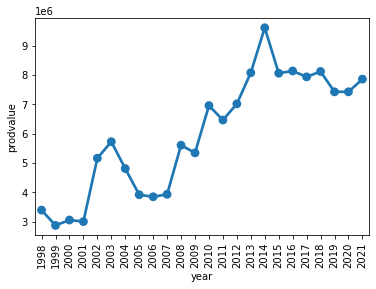

In [60]:
sns.pointplot(x="year", y="prodvalue", data=df, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

## Observations :-

- Interesting trend to see . As the total production has declined over the years, the value of production per pound has increased over time.
- As the supply declined, the demand has added to the value of honey.

## 6:- Constructs there lated plots using Seaborn and Matplot apply customization and derive insights from the visualization.

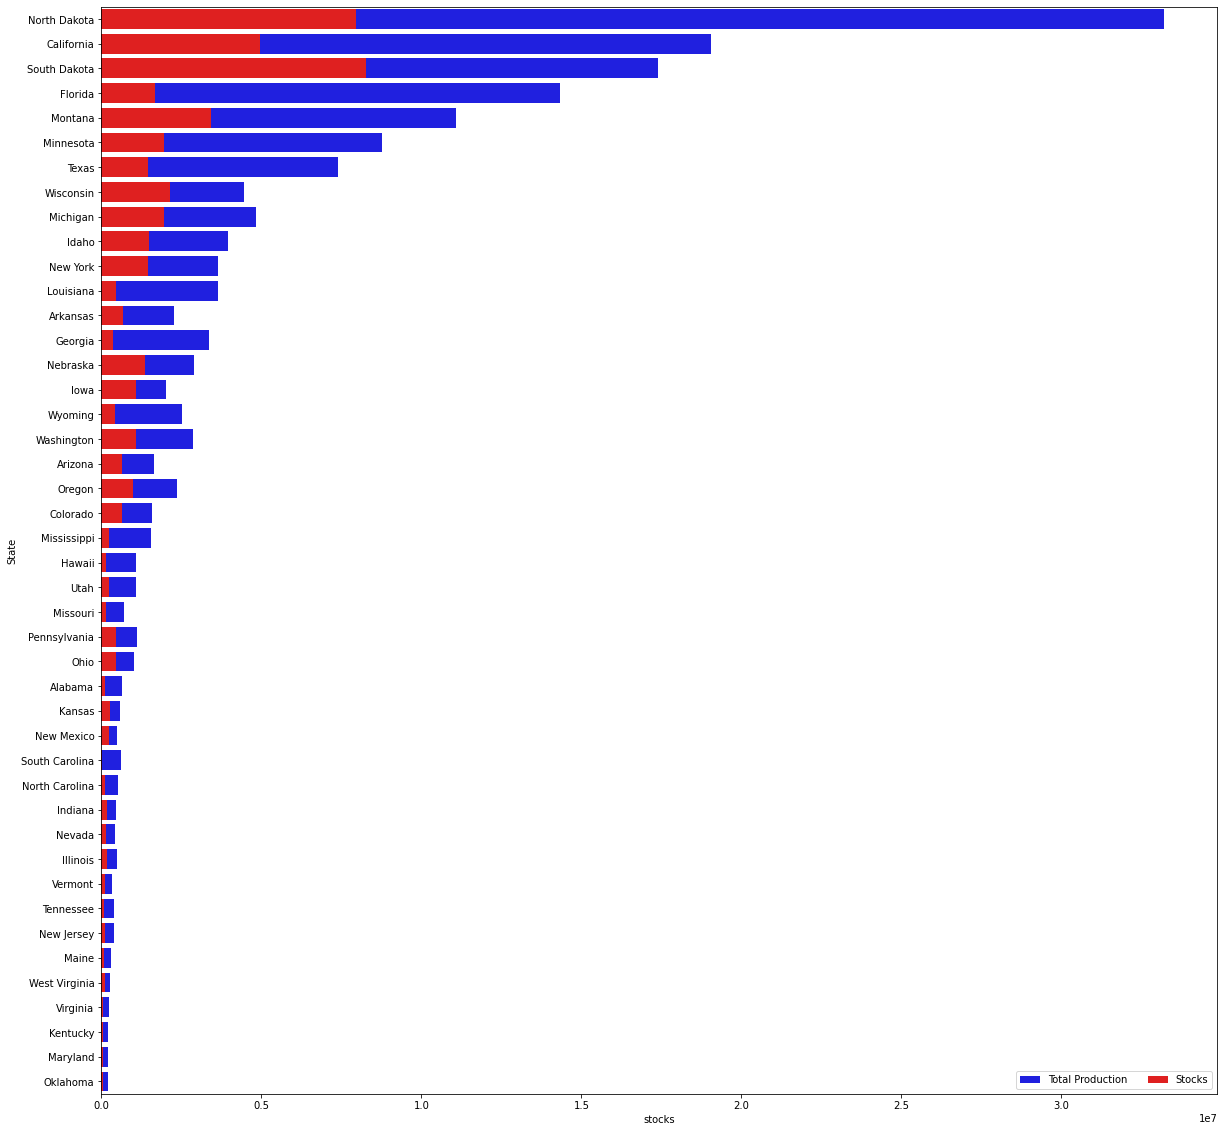

In [61]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="State", data=df.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="State", data=df.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()



## Observation :-
- North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.
- Florida has the highest efficiency among the major honey producing states.
- Michigan is more efficient than Wisconsin in selling honey.


## Now check the average price per pound of honey across states


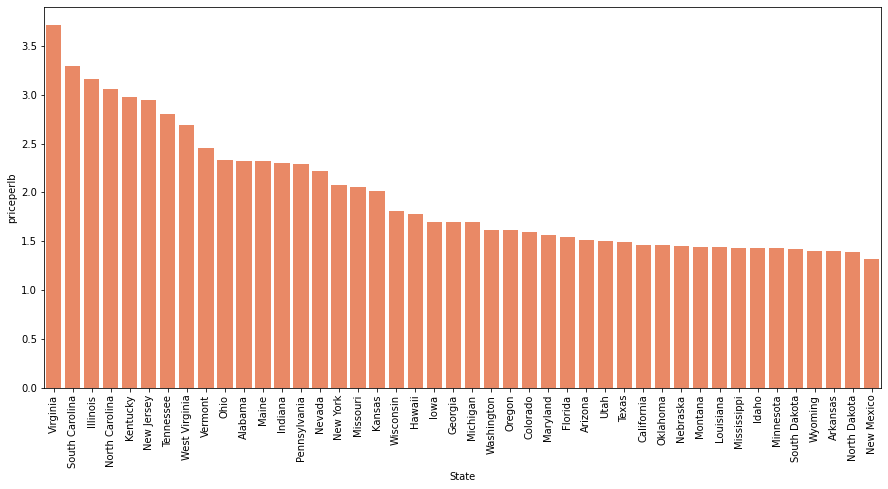

In [112]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.barplot(data = df, x = "State", y = "priceperlb", ci=None, color = "coral",
            order=df.groupby('State').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

## Observations:

- Virginia has the highest price per pound of honey.
- The average price per pound of honey in the major honey producing states is towards the lower end.

## Conclusion :-

- We can conclude that the total honey production has decresed over the years whereas the value of production per pound has increased.

- The reason for the declined honey production is the decrease in the yield per colony over the years.
- The major honey producing states are California, Florida, North Dakota, South Dakota and Montana.
- Among these, Florida has been very efficient in selling honey.